Basic scikits-leaarn toolchain msetup

In [376]:
from multiprocessing import cpu_count

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier as Classifier
from sklearn.cross_validation import train_test_split

In [377]:
RANDOM_SEED = 0xeeeeff

In [378]:
signal = pd.DataFrame.from_csv('out_sig.txt', index_col= 0, sep=r'\t')
background = pd.DataFrame.from_csv('out_bk.txt', index_col= 0, sep=r'\t')
signal.columns = background.columns = [s.strip() for s in signal.columns]

#signal = signal[signal[' Weight'] > 0.005]
#background = background[background[' Weight'] > 0.005]

data = pd.concat([signal, background])
features, weights = data.iloc[:, :-1], data.iloc[:,-1]
weights = np.abs(weights).as_matrix()
labels = np.r_[np.ones(len(signal)), np.zeros(len(background))]

#We split between testing and training by further starifying on weights, by ignoring the smaller ones for each
#category (for the purposes of splitting, we assign them to a third category '2' that tunrns out to be split evenly as well).
weighted_cats = labels.copy()
label_mask = labels.astype(bool)
small_signal = (weights < weights[label_mask].mean()) & label_mask
weighted_cats[small_signal] = 2

small_background = (weights < weights[~label_mask].mean()) & ~label_mask
weighted_cats[small_background] = 2


X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features, labels, weights,
                                                                     random_state = RANDOM_SEED, 
                                                                     test_size=0.5, stratify=weighted_cats)



#X_train, y_train, w_train = features, labels, weights

/home/zah/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:1177: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  infer_datetime_format=infer_datetime_format)


In [379]:
len(X_train)

439

In [380]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([   1.,    3.,    5.,   25.,   37.,   74.,  139.,  185.,  141.,  268.]),
 array([-15.94187019, -14.21345018, -12.48503017, -10.75661016,
         -9.02819016,  -7.29977015,  -5.57135014,  -3.84293013,
         -2.11451013,  -0.38609012,   1.34232989]),
 <a list of 10 Patch objects>)

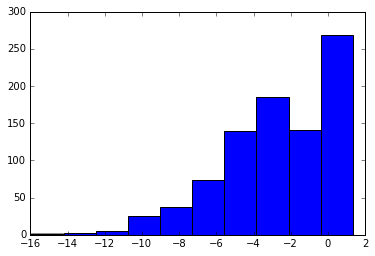

In [381]:
plt.hist(np.log10(weights))

In [382]:
len(data)

878

In [383]:
clf = Classifier(n_estimators=10000, max_depth=None, min_samples_split=5, n_jobs=cpu_count() ,random_state=RANDOM_SEED)

In [384]:
clf.fit(X_train,y_train, sample_weight=w_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=4,
            oob_score=False, random_state=15658751, verbose=0,
            warm_start=False)

In [385]:
features.columns

Index(['W pT', '| Delta eta j1,j2 |', 'Delta R j1,j2', 'm j1, j2', 'N of jets',
       'j1 pT', 'j2 pT', 'Centrality', '| Delta Phi l1, l2 |', 'm l1, l2',
       'Empty', '| Delta eta l1,l2 |', 'mET (scalar)', 'mET phi',
       'dijet min distance', 'Zeppenfeld Var', 'Cos |tot phi|',
       'Cos | deltaphi(j1+j2,l1+l2) |', 'Empty .1'],
      dtype='object')

In [386]:
clf.score(X_test, y_test, sample_weight=w_test)

0.95354678736268195

In [389]:
est_scores = [est.score(X_test, y_test, sample_weight=w_test) for est in clf.estimators_]

In [397]:
from smpdflib.initialization import init_style
init_style()

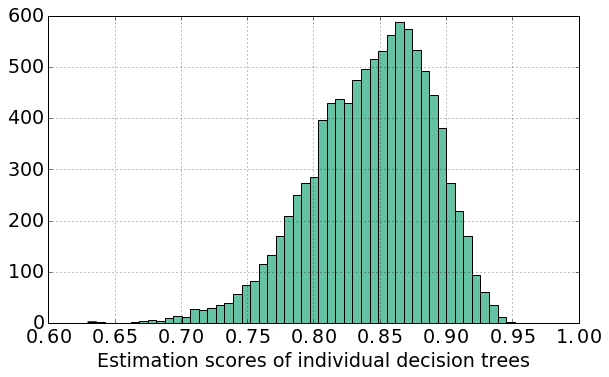

In [403]:
plt.hist(est_scores, bins=50)
plt.xlabel("Estimation scores of individual decision trees")
plt.savefig("ind_dt_dist.pdf")

In [366]:
sum(w_test)

343.06791276111221

In [367]:
sum(w_train)

340.37412656446122

In [368]:
importances = clf.feature_importances_

In [291]:
import matplotlib.pyplot as plt

In [292]:
importances = pd.Series(importances, index=features.columns)

In [293]:
sv = importances.sort_values()
c,d = sv.index[-2:]

In [296]:
best_features = sv.index[-4:]

In [354]:
sv

Empty .1                         0.000000
Empty                            0.000000
j2 pT                            0.041577
N of jets                        0.045108
Cos |tot phi|                    0.045245
j1 pT                            0.045835
m l1, l2                         0.046022
m j1, j2                         0.048248
| Delta eta l1,l2 |              0.048960
mET phi                          0.049322
dijet min distance               0.057459
Zeppenfeld Var                   0.059244
| Delta Phi l1, l2 |             0.060786
Delta R j1,j2                    0.063132
mET (scalar)                     0.065249
W pT                             0.065868
Centrality                       0.066286
Cos | deltaphi(j1+j2,l1+l2) |    0.079018
| Delta eta j1,j2 |              0.112642
dtype: float64

W pT
W pT
W pT
Centrality
Centrality
Cos | deltaphi(j1+j2,l1+l2) |


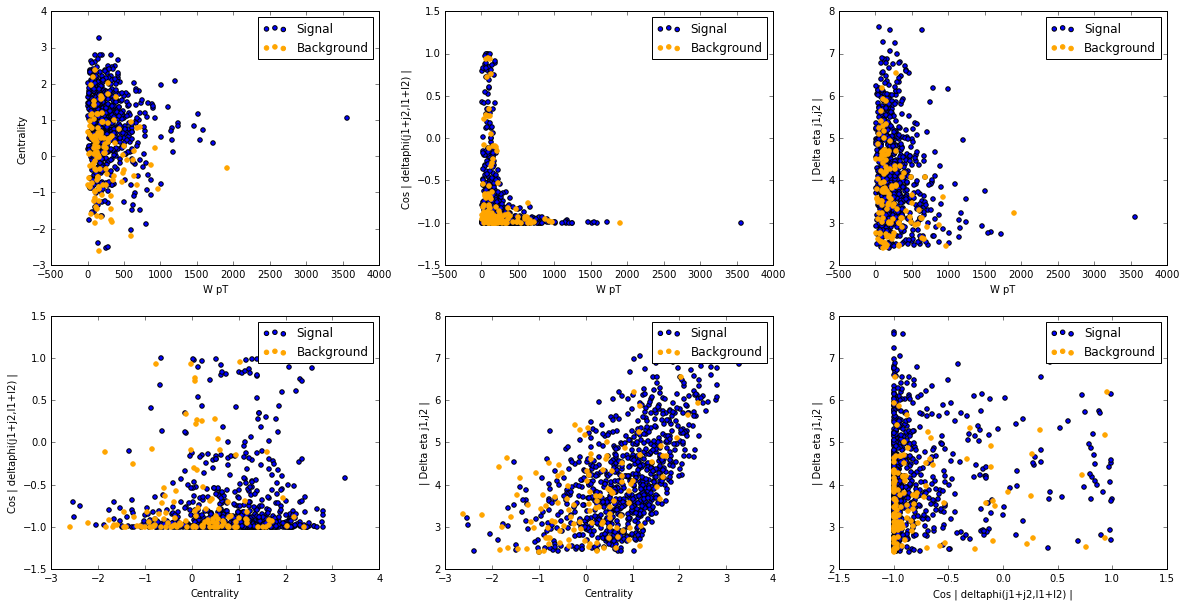

In [352]:
import itertools
pairs = (itertools.combinations(best_features,2))
fig, axes = plt.subplots(2,3, figsize=(20, 10))
axiter = (ax  for l in axes for ax in l)
for (c,d), ax in zip(pairs, axiter):
    print(c)
    ax.scatter(c,d, data=signal, label="Signal")
    ax.scatter(c,d, data=background, color='orange', label="Background")
    ax.set_xlabel(c)
    ax.set_ylabel(d)
    ax.legend(loc='best')

plt.savefig("features.pdf")
    

In [355]:
clf.estimators_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [345]:
pairs

In [323]:
next(iter(axes))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2255a2b668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2255a9c1d0>], dtype=object)

In [305]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10000,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 15658751,
 'verbose': 0,
 'warm_start': False}

In [258]:
e = clf.estimators_[0]

In [261]:
t = e.tree_

In [264]:
t.threshold

array([  4.85649967e+00,   8.79783020e+01,   9.72529531e-01,
         1.22497002e+02,  -2.00000000e+00,   2.43118500e+02,
        -2.00000000e+00,  -2.00000000e+00,  -2.00000000e+00,
         8.48295441e+01,   2.32835999e+02,   9.97276545e-01,
         5.49617481e+00,  -2.00000000e+00,  -2.00000000e+00,
        -2.00000000e+00,   6.23039474e+01,  -2.00000000e+00,
        -2.00000000e+00,   1.15229500e+02,   6.81654513e-01,
         4.41116524e+00,   7.96250522e-01,   2.26356006e+00,
         3.58031988e+00,  -2.00000000e+00,  -2.00000000e+00,
        -2.00000000e+00,   1.74493492e-01,  -2.00000000e+00,
        -2.00000000e+00,  -2.00000000e+00,   3.98580003e+00,
         1.04391998e+02,   8.67980003e-01,  -2.00000000e+00,
        -2.00000000e+00,  -5.87382495e-01,  -2.00000000e+00,
        -2.00000000e+00,  -2.00000000e+00,   5.09356499e+01,
         1.27720296e+00,  -2.00000000e+00,  -2.00000000e+00,
         1.44793488e+02,   1.38882996e+02,   3.01245999e+00,
        -2.00000000e+00,

In [265]:
len(_)

75